In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
class LinearRegressions:
    def __init__(self):
        self.weights = None

    def _add_bias(self,x):
        ones = np.ones((x.shape[0],1))
        return np.hstack((ones,x))

    def fit(self,x,y,lr=0.1,epoch=100):
        x = np.asarray(x,dtype=float)
        y = np.asarray(y,dtype=float).reshape(-1,1)
        if x.ndim==1:
            x = x.reshape(-1,1)
        bx = self._add_bias(x)
        n,d = bx.shape
        self.weights = np.zeros((d,1))
        self.lossHistory = []
        for _ in range(epoch):
            prediction = bx @ self.weights
            error = prediction-y
            loss = np.mean(error**2)
            self.lossHistory.append(loss)
            gradiant = (2/n)*(bx.T @ error)
            self.weights = self.weights - (lr*gradiant)

    def predict(self,x):
        if self.weights is None:
            raise ValueError("Model is not trained")
        x = np.asarray(x,dtype=float)
        if x.ndim==1:
            x = x.reshape(-1,1)
        bx = self._add_bias(x)
        return np.dot(bx,self.weights).ravel()

    def mse(self,x,y):
        y = np.asarray(y,dtype=float).ravel()
        prediction = self.predict(x)
        error = prediction - y
        return np.mean(error**2)

    def plot_loss(self):
        plt.figure()
        plt.plot(self.lossHistory)
        plt.title("Loss vs Epochs")
        plt.xlabel("Epochs")
        plt.ylabel("MSE loss")
        plt.show()

Weights are: [0.98628546 2.00466462]
Prediction for x=5: [11.00960854]
Mean Squared Error: 3.1413124765933945e-05


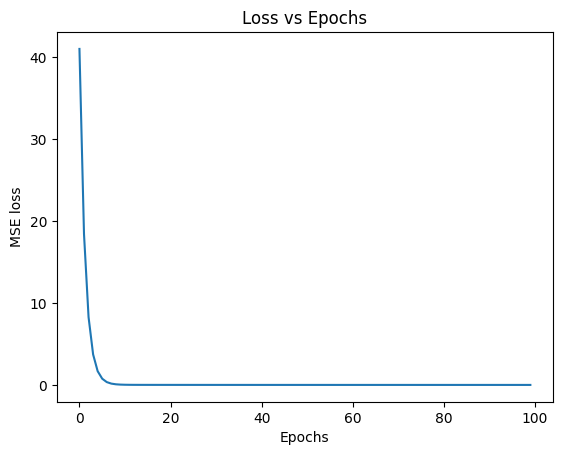

In [25]:
import numpy as np
x = np.array([[1], [2], [3], [4]])
y = np.array([3, 5, 7, 9])
model = LinearRegressions()
model.fit(x, y)
print("Weights are:", model.weights.ravel())
print("Prediction for x=5:", model.predict([5]))
print("Mean Squared Error:", model.mse(x, y))
model.plot_loss()